<a href="https://colab.research.google.com/github/Pashademid/project_forbes/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Project_Forbes_2022_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

df = pd.read_csv("2022_forbes_billionaires.csv",usecols=["rank","name","networth","age","country","source","industry"])
df.head()

,rank,name,networth,age,country,source,industry
0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   rank      2600 non-null   int64 
 1   name      2600 non-null   object
 2   networth  2600 non-null   object
 3   age       2600 non-null   int64 
 4   country   2600 non-null   object
 5   source    2600 non-null   object
 6   industry  2600 non-null   object
dtypes: int64(2), object(5)
memory usage: 142.3+ KB


In [8]:
df.describe()

,rank,age
count,2600.000000,2600.000000
mean,1269.570769,64.271923
std,728.146364,13.220607
min,1.000000,19.000000
25%,637.000000,55.000000
50%,1292.000000,64.000000
75%,1929.000000,74.000000
max,2578.000000,100.000000


In [9]:
df.isna().any()

,0
rank,False
name,False
networth,False
age,False
country,False
source,False
industry,False


In [10]:
df["networth"] = df["networth"].astype("string").str.replace(r"[$B]","",regex=True).astype("float")

In [11]:
df.sort_values("networth",ascending=False)

,rank,name,networth,age,country,source,industry
0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,129.0,66,United States,Microsoft,Technology
4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...
2595,2578,Jorge Gallardo Ballart,1.0,80,Spain,pharmaceuticals,Healthcare
2596,2578,Nari Genomal,1.0,82,Philippines,apparel,Fashion & Retail
2597,2578,Ramesh Genomal,1.0,71,Philippines,apparel,Fashion & Retail
2598,2578,Sunder Genomal,1.0,68,Philippines,garments,Fashion & Retail


# Описательная статистика

In [12]:
# Количество миллиардеров в списке
tottal_billionaires = len(df)
print('Кол-во миллиардеров =',tottal_billionaires)

Кол-во миллиардеров = 2600


In [13]:
#Средний, медианный возраст миллиардера
mean_age = df["age"].mean()
median_age =df["age"].median()
print('Средний возраст =',mean_age)
print('Медиана =',median_age)

Средний возраст = 64.27192307692307
Медиана = 64.0


In [14]:
#Среднее, минимальное и максимальное состояние
mean_networth = df["networth"].mean()
max_networth = df["networth"].max()
min_networth = df["networth"].min()

print('Среднее =',mean_networth)
print('Максимальное =',max_networth)
print('Минимальное =',min_networth)

Среднее = 4.8607499999999995
Максимальное = 219.0
Минимальное = 1.0


In [15]:
#Топ-10 по состоянию
df.head(10)

,rank,name,networth,age,country,source,industry
0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,129.0,66,United States,Microsoft,Technology
4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments
5,6,Larry Page,111.0,49,United States,Google,Technology
6,7,Sergey Brin,107.0,48,United States,Google,Technology
7,8,Larry Ellison,106.0,77,United States,software,Technology
8,9,Steve Ballmer,91.4,66,United States,Microsoft,Technology
9,10,Mukesh Ambani,90.7,64,India,diversified,Diversified


# География миллиардов

In [16]:
# Топ 5 стран по количесвтву миллиардеров
df.groupby("country")["name"].count().sort_values(ascending=False).head(5)

,name
country,
United States,719
China,515
India,161
Germany,130
Russia,81


In [17]:
# Топ стран по суммарному состоянию

In [18]:
df.groupby("country")["networth"].sum().sort_values(ascending=False).head(5)

,networth
country,
United States,4685.10
China,1938.45
India,744.80
Germany,604.00
France,550.00


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Elon Musk '),
  Text(1, 0, 'Jeff Bezos '),
  Text(2, 0, 'Bernard Arnault & family '),
  Text(3, 0, 'Bill Gates '),
  Text(4, 0, 'Warren Buffett ')])

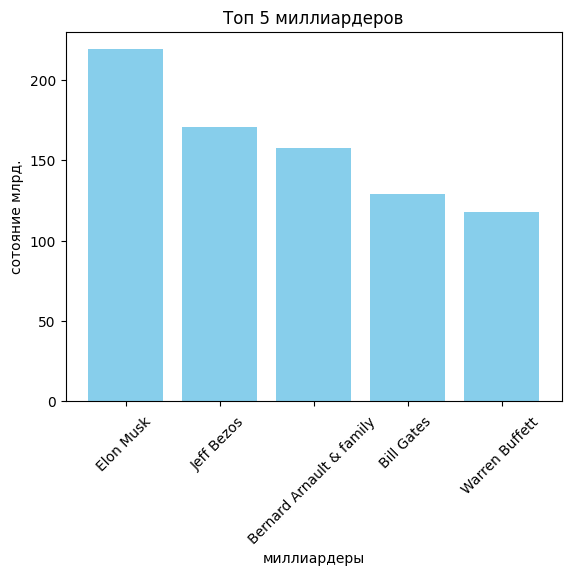

In [19]:
# Визуализация итогов
top5 = df[["networth","name"]].head(5)
plt.bar(top5["name"],top5['networth'],color='skyblue')
plt.title("Топ 5 миллиардеров")
plt.xlabel("миллиардеры")
plt.ylabel("сотояние млрд.")
plt.xticks(rotation=45)